<a href="https://colab.research.google.com/github/kashishdatta/Deep-Learning-A-Z/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RECURRENT NEURAL NETWORK

DATA PREPROCESSING

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a Data Structure with 60 Timesteps and 1 Output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

BUILDING AND TRAINING THE RNN

Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initializing the RNN

In [7]:
regressor = Sequential()

Adding the First LSTM layer and some Dropout Regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding the Second LSTM layer and some Dropout Regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the Third LSTM layer and some Dropout Regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the Fourth LSTM layer and some Dropout Regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the Output Layer

In [14]:
regressor.add(Dense(units=1))

Compiling the RNN

In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Fitting the RNN to the Training Set

In [17]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 148ms/step - loss: 0.0444
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0070
Epoch 4/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0041
Epoch 13/100

MAKING PREDICTIONS AND VISUALISING THE RESULTS

Getting real stock prize of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualising the Results

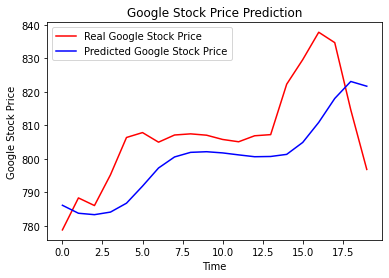

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()